## DiCA - divay dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

### divay data

In [2]:
#vins dataset
from discrimintools.datasets import load_divay
D = load_divay()
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   12 non-null     object
 1   Woody    12 non-null     object
 2   Fruity   12 non-null     object
 3   Sweet    12 non-null     object
 4   Alcohol  12 non-null     object
 5   Hedonic  12 non-null     object
dtypes: object(6)
memory usage: 704.0+ bytes


In [3]:
#display
print(D)

        Region    Woody    Fruity    Sweet    Alcohol    Hedonic
0        Loire  Woody_A  Fruity_C  Sweet_B  Alcohol_A  Hedonic_A
1        Loire  Woody_B  Fruity_C  Sweet_C  Alcohol_B  Hedonic_C
2        Loire  Woody_A  Fruity_B  Sweet_B  Alcohol_A  Hedonic_B
3        Loire  Woody_A  Fruity_C  Sweet_C  Alcohol_B  Hedonic_D
4        Rhone  Woody_A  Fruity_B  Sweet_A  Alcohol_C  Hedonic_C
5        Rhone  Woody_B  Fruity_A  Sweet_A  Alcohol_C  Hedonic_B
6        Rhone  Woody_C  Fruity_B  Sweet_B  Alcohol_B  Hedonic_A
7        Rhone  Woody_B  Fruity_C  Sweet_C  Alcohol_C  Hedonic_D
8   Beaujolais  Woody_C  Fruity_A  Sweet_C  Alcohol_A  Hedonic_A
9   Beaujolais  Woody_B  Fruity_A  Sweet_C  Alcohol_A  Hedonic_B
10  Beaujolais  Woody_C  Fruity_B  Sweet_B  Alcohol_B  Hedonic_D
11  Beaujolais  Woody_C  Fruity_A  Sweet_A  Alcohol_A  Hedonic_C


In [4]:
#split into X and y
y, X = D["Region"], D.drop(columns=["Region"])

### Instanciation & training

In [5]:
#instanciation and training
from discrimintools import DiCA
clf = DiCA(n_components=2)


#### ``fit` function

In [6]:
#fit function
clf.fit(X,y)

,n_components,2
,classes,None


#### `decision_function` function

In [7]:
#decision_function function
print(clf.decision_function(X))

    Beaujolais     Loire     Rhone
0    -2.046775 -1.129275 -2.076775
1    -1.716775 -1.129275 -1.506775
2    -1.593228 -1.125728 -1.623228
3    -2.163228 -1.125728 -1.953228
4    -2.330710 -2.093210 -1.200710
5    -1.976415 -2.638915 -1.296415
6    -1.241993 -1.404493 -1.361993
7    -1.984479 -1.546979 -1.174479
8    -1.171483 -2.203983 -2.221483
9    -1.109922 -1.692422 -1.709922
10   -1.241993 -1.404493 -1.361993
11   -1.183472 -2.415972 -1.913472


#### `eval_predict` function

In [8]:
#eval_predict function
evl = clf.eval_predict(X,y,verbose=True)

Observation Profile:
                        Read  Used
Number of Observations    12    12

Number of Observations Classified into Region:
prediction  Beaujolais  Loire  Rhone  Total
Region                                     
Beaujolais           4      0      0      4
Loire                0      4      0      4
Rhone                1      0      3      4
Total                5      4      3     12

Percent Classified into Region:
prediction  Beaujolais       Loire      Rhone  Total
Region                                              
Beaujolais  100.000000    0.000000   0.000000  100.0
Loire         0.000000  100.000000   0.000000  100.0
Rhone        25.000000    0.000000  75.000000  100.0
Total        41.666667   33.333333  25.000000  100.0
Priors        0.333333    0.333333   0.333333    NaN

Error Count Estimates for Region:
        Beaujolais     Loire     Rhone     Total
Rate      0.000000  0.000000  0.250000  0.083333
Priors    0.333333  0.333333  0.333333       NaN

Classifica

#### `fit_transform` function

In [9]:
#fit_transform function
print(clf.fit_transform(X,y))

        Can1      Can2
0  -0.819841 -0.423303
1  -0.499227 -0.045801
2  -0.427087 -0.248651
3  -0.891982 -0.220453
4  -0.068806  1.046165
5   0.655588  0.927798
6   0.110547 -0.097673
7  -0.286823  0.635976
8   0.743569 -0.726531
9   0.411929 -0.433513
10  0.110547 -0.097673
11  0.961586 -0.316342


#### `pred_table` function

In [10]:
#pred_table function
print(clf.pred_table(X,y))

prediction  Beaujolais  Loire  Rhone
Region                              
Beaujolais           4      0      0
Loire                0      4      0
Rhone                1      0      3


#### `predict` function

In [11]:
#predict function
print(clf.predict(X))

0          Loire
1          Loire
2          Loire
3          Loire
4          Rhone
5          Rhone
6     Beaujolais
7          Rhone
8     Beaujolais
9     Beaujolais
10    Beaujolais
11    Beaujolais
Name: prediction, dtype: object


#### `predict_log_proba` function

In [12]:
#predict_log_prob function
print(clf.predict_log_proba(X))

    Beaujolais     Loire     Rhone
0    -1.498165 -0.580665 -1.528165
1    -1.394551 -0.807051 -1.184551
2    -1.271569 -0.804069 -1.301569
3    -1.620542 -0.583042 -1.410542
4    -1.679660 -1.442160 -0.549660
5    -1.249741 -1.912241 -0.569741
6    -1.006839 -1.169339 -1.126839
7    -1.567936 -1.130436 -0.757936
8    -0.534183 -1.566683 -1.584183
9    -0.745413 -1.327913 -1.345413
10   -1.006839 -1.169339 -1.126839
11   -0.572939 -1.805439 -1.302939


#### `predic_proba` function

In [13]:
#predict_proba function
print(clf.predict_proba(X))

    Beaujolais     Loire     Rhone
0     0.223540  0.559526  0.216933
1     0.247944  0.446172  0.305884
2     0.280391  0.447504  0.272104
3     0.197791  0.558198  0.244011
4     0.186437  0.236417  0.577146
5     0.286579  0.147749  0.565672
6     0.365372  0.310572  0.324056
7     0.208475  0.322892  0.468633
8     0.586148  0.208736  0.205115
9     0.474538  0.265030  0.260432
10    0.365372  0.310572  0.324056
11    0.563866  0.164402  0.271732


#### `score` function

In [14]:
#score function
print("Accurary = {}%".format(round(100*clf.score(X,y))))

Accurary = 92%


#### `transform` function

In [15]:
#transform function
print(clf.transform(X))

        Can1      Can2
0  -0.819841 -0.423303
1  -0.499227 -0.045801
2  -0.427087 -0.248651
3  -0.891982 -0.220453
4  -0.068806  1.046165
5   0.655588  0.927798
6   0.110547 -0.097673
7  -0.286823  0.635976
8   0.743569 -0.726531
9   0.411929 -0.433513
10  0.110547 -0.097673
11  0.961586 -0.316342


### Canonical coefficients

In [16]:
#canonical coefficients
cancoef = clf.cancoef_
for i, k in enumerate(cancoef._fields):
    print("\n{} coefficients".format(k))
    print(cancoef[i].round(3))


standardized coefficients
            Can1   Can2
Woody_A   -1.862 -0.094
Woody_B    0.102  0.779
Woody_C    1.760 -0.686
Fruity_A   1.760 -0.686
Fruity_B   0.102  0.779
Fruity_C  -1.862 -0.094
Sweet_A    1.009  1.427
Sweet_B   -0.655 -0.291
Sweet_C   -0.081 -0.624
Alcohol_A  0.279 -1.638
Alcohol_B -0.655 -0.291
Alcohol_C  0.407  3.118
Hedonic_A -0.000 -0.000
Hedonic_B -0.000 -0.000
Hedonic_C -0.000 -0.000
Hedonic_D -0.000 -0.000

projection coefficients
            Can1   Can2
Woody_A   -0.372 -0.019
Woody_B    0.020  0.156
Woody_C    0.352 -0.137
Fruity_A   0.352 -0.137
Fruity_B   0.020  0.156
Fruity_C  -0.372 -0.019
Sweet_A    0.202  0.285
Sweet_B   -0.131 -0.058
Sweet_C   -0.016 -0.125
Alcohol_A  0.056 -0.328
Alcohol_B -0.131 -0.058
Alcohol_C  0.081  0.624
Hedonic_A -0.000 -0.000
Hedonic_B -0.000 -0.000
Hedonic_C -0.000 -0.000
Hedonic_D -0.000 -0.000


### summary

In [17]:
#summary
from discrimintools import summaryDiCA
summaryDiCA(clf, detailed=True)

                     Discriminant Correspondence Analysis - Results                     

Class Level Information:
            Frequency  Proportion  Prior Probability
Beaujolais          4      0.3333             0.3333
Loire               4      0.3333             0.3333
Rhone               4      0.3333             0.3333

Importance of components:
      Eigenvalue  Difference  Proportion (%)  Cumulative (%)
Can1      0.2519      0.0504         55.5635         55.5635
Can2      0.2014         NaN         44.4365        100.0000

Canonical correlation:
      Eigenvalue  Total SS  Eta Sq.  Canonical Correlation
Can1      0.2519    4.0879   0.7394                 0.8599
Can2      0.2014    3.4864   0.6934                 0.8327

Classification (projection) coefficients:
             Can1    Can2
Woody_A   -0.3724 -0.0188
Woody_B    0.0204  0.1559
Woody_C    0.3520 -0.1371
Fruity_A   0.3520 -0.1371
Fruity_B   0.0204  0.1559
Fruity_C  -0.3724 -0.0188
Sweet_A    0.2017  0.2855
Sweet_B   -

### Evaluation of prediction on testing dataset

In [18]:
#test data
XTest = load_divay("test")
print(XTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Woody    1 non-null      object
 1   Fruity   1 non-null      object
 2   Sweet    1 non-null      object
 3   Alcohol  1 non-null      object
 4   Hedonic  1 non-null      object
dtypes: object(5)
memory usage: 168.0+ bytes
None


In [19]:
#display test data
print(XTest)

     Woody    Fruity    Sweet    Alcohol    Hedonic
0  Woody_A  Fruity_C  Sweet_B  Alcohol_B  Hedonic_A


#### Coordinates of new individuals

In [20]:
#coordinates of new individuals
print(clf.transform(XTest))

       Can1      Can2
0 -1.006603 -0.153958


#### Prediction on new individuals

In [21]:
#predict on supplementary
print(clf.predict(XTest))

0    Loire
Name: prediction, dtype: object


### Correspondence Analysis

#### Eigenvalues

In [22]:
#eigenvalues
print(clf.eig_)

      Eigenvalue  Difference  Proportion (%)  Cumulative (%)
Can1    0.251888    0.050442        55.56351        55.56351
Can2    0.201445         NaN        44.43649       100.00000


#### Classes

In [23]:
#classes
classes = clf.classes_
classes._fields

('infos', 'coord', 'eucl', 'gen')

##### Classes level informations

In [24]:
#classes level information
print(classes.infos)

            Frequency  Proportion  Prior Probability
Beaujolais          4    0.333333           0.333333
Loire               4    0.333333           0.333333
Rhone               4    0.333333           0.333333


##### Classes coordinates

In [25]:
#classes coordinates
print(classes.coord)

                Can1      Can2
Beaujolais  0.556908 -0.393515
Loire      -0.659534 -0.234552
Rhone       0.102626  0.628067


##### Classes squared euclidean distance

In [26]:
#classes squared euclidean distance
print(classes.eucl)

            Beaujolais  Loire  Rhone
Beaujolais       0.000  1.505  1.250
Loire            1.505  0.000  1.325
Rhone            1.250  1.325  0.000


##### Classes generalized squared distance

In [27]:
#classes generalized squared distance
print(classes.gen)

            Beaujolais     Loire     Rhone
Beaujolais    2.197225  3.702225  3.447225
Loire         3.702225  2.197225  3.522225
Rhone         3.447225  3.522225  2.197225


#### Variables

In [28]:
#variables
var = clf.var_
var._fields

('coord', 'eta2')

##### Variables coordinates

In [29]:
#variables coordinates
print(var.coord)

                   Can1          Can2
Woody_A   -9.344663e-01 -4.210386e-02
Woody_B    5.112059e-02  3.498381e-01
Woody_C    8.833457e-01 -3.077342e-01
Fruity_A   8.833457e-01 -3.077342e-01
Fruity_B   5.112059e-02  3.498381e-01
Fruity_C  -9.344663e-01 -4.210386e-02
Sweet_A    5.061994e-01  6.406472e-01
Sweet_B   -3.285290e-01 -1.306473e-01
Sweet_C   -4.089647e-02 -2.798705e-01
Alcohol_A  1.401338e-01 -7.350936e-01
Alcohol_B -3.285290e-01 -1.306473e-01
Alcohol_C  2.044823e-01  1.399352e+00
Hedonic_A -2.543383e-32 -6.351547e-32
Hedonic_B -2.543383e-32 -6.351547e-32
Hedonic_C -2.543383e-32 -6.351547e-32
Hedonic_D -2.543383e-32 -6.351547e-32


##### Variables squared correlation ratio

In [30]:
#variables squared correlation ratio
print(var.eta2)

             Can1      Can2
Woody    0.529840  0.195969
Fruity   0.856351  0.047788
Sweet    0.273208  0.352479
Alcohol  0.128115  0.931320
Hedonic  0.139224  0.208958


#### Individuals

In [31]:
#individuals
ind = clf.ind_
ind._fields

('coord', 'eucl', 'gen')

##### Individuals coordinates 

In [32]:
#individuals coordinates
print(ind.coord)

        Can1      Can2
0  -0.819841 -0.423303
1  -0.499227 -0.045801
2  -0.427087 -0.248651
3  -0.891982 -0.220453
4  -0.068806  1.046165
5   0.655588  0.927798
6   0.110547 -0.097673
7  -0.286823  0.635976
8   0.743569 -0.726531
9   0.411929 -0.433513
10  0.110547 -0.097673
11  0.961586 -0.316342


##### Individuals squared euclidean distance

In [33]:
#individuals squared euclidean distance
print(ind.eucl)

    Beaujolais     Loire     Rhone
0     1.896325  0.061325  1.956325
1     1.236325  0.061325  0.816325
2     0.989231  0.054231  1.049231
3     2.129231  0.054231  1.709231
4     2.464195  1.989195  0.204195
5     1.755606  3.080606  0.395606
6     0.286761  0.611761  0.526761
7     1.771733  0.896733  0.151733
8     0.145742  2.210742  2.245742
9     0.022619  1.187619  1.222619
10    0.286761  0.611761  0.526761
11    0.169720  2.634720  1.629720


##### Individuals generalized squared distance

In [34]:
#individuals generalized squared dsistance
print(ind.gen)

    Beaujolais     Loire     Rhone
0     4.093550  2.258550  4.153550
1     3.433550  2.258550  3.013550
2     3.186455  2.251455  3.246455
3     4.326455  2.251455  3.906455
4     4.661420  4.186420  2.401420
5     3.952831  5.277831  2.592831
6     2.483985  2.808985  2.723985
7     3.968958  3.093958  2.348958
8     2.342967  4.407967  4.442967
9     2.219843  3.384843  3.419843
10    2.483985  2.808985  2.723985
11    2.366945  4.831945  3.826945


### Discriminat analysis

#### Canonical coefficients

In [35]:
#canonical coefficients
cancoef = clf.cancoef_
cancoef._fields

('standardized', 'projection')

##### Standardized canonical coefficients

In [36]:
#standardized canonical coefficients
print(cancoef.standardized)

                   Can1          Can2
Woody_A   -1.861916e+00 -9.380873e-02
Woody_B    1.018573e-01  7.794502e-01
Woody_C    1.760058e+00 -6.856415e-01
Fruity_A   1.760058e+00 -6.856415e-01
Fruity_B   1.018573e-01  7.794502e-01
Fruity_C  -1.861916e+00 -9.380873e-02
Sweet_A    1.008598e+00  1.427382e+00
Sweet_B   -6.545910e-01 -2.910863e-01
Sweet_C   -8.148584e-02 -6.235602e-01
Alcohol_A  2.792152e-01 -1.637811e+00
Alcohol_B -6.545910e-01 -2.910863e-01
Alcohol_C  4.074292e-01  3.117801e+00
Hedonic_A -5.067666e-32 -1.415145e-31
Hedonic_B -5.067666e-32 -1.415145e-31
Hedonic_C -5.067666e-32 -1.415145e-31
Hedonic_D -5.067666e-32 -1.415145e-31


##### Projection canonical coefficients

In [37]:
#projection canonical coefficients
print(cancoef.projection)

                   Can1          Can2
Woody_A   -3.723831e-01 -1.876175e-02
Woody_B    2.037146e-02  1.558900e-01
Woody_C    3.520117e-01 -1.371283e-01
Fruity_A   3.520117e-01 -1.371283e-01
Fruity_B   2.037146e-02  1.558900e-01
Fruity_C  -3.723831e-01 -1.876175e-02
Sweet_A    2.017195e-01  2.854764e-01
Sweet_B   -1.309182e-01 -5.821726e-02
Sweet_C   -1.629717e-02 -1.247120e-01
Alcohol_A  5.584305e-02 -3.275623e-01
Alcohol_B -1.309182e-01 -5.821726e-02
Alcohol_C  8.148584e-02  6.235602e-01
Hedonic_A -1.013533e-32 -2.830289e-32
Hedonic_B -1.013533e-32 -2.830289e-32
Hedonic_C -1.013533e-32 -2.830289e-32
Hedonic_D -1.013533e-32 -2.830289e-32


### plotting

In [38]:
from discrimintools import fviz_dica

#### Graph of individuals

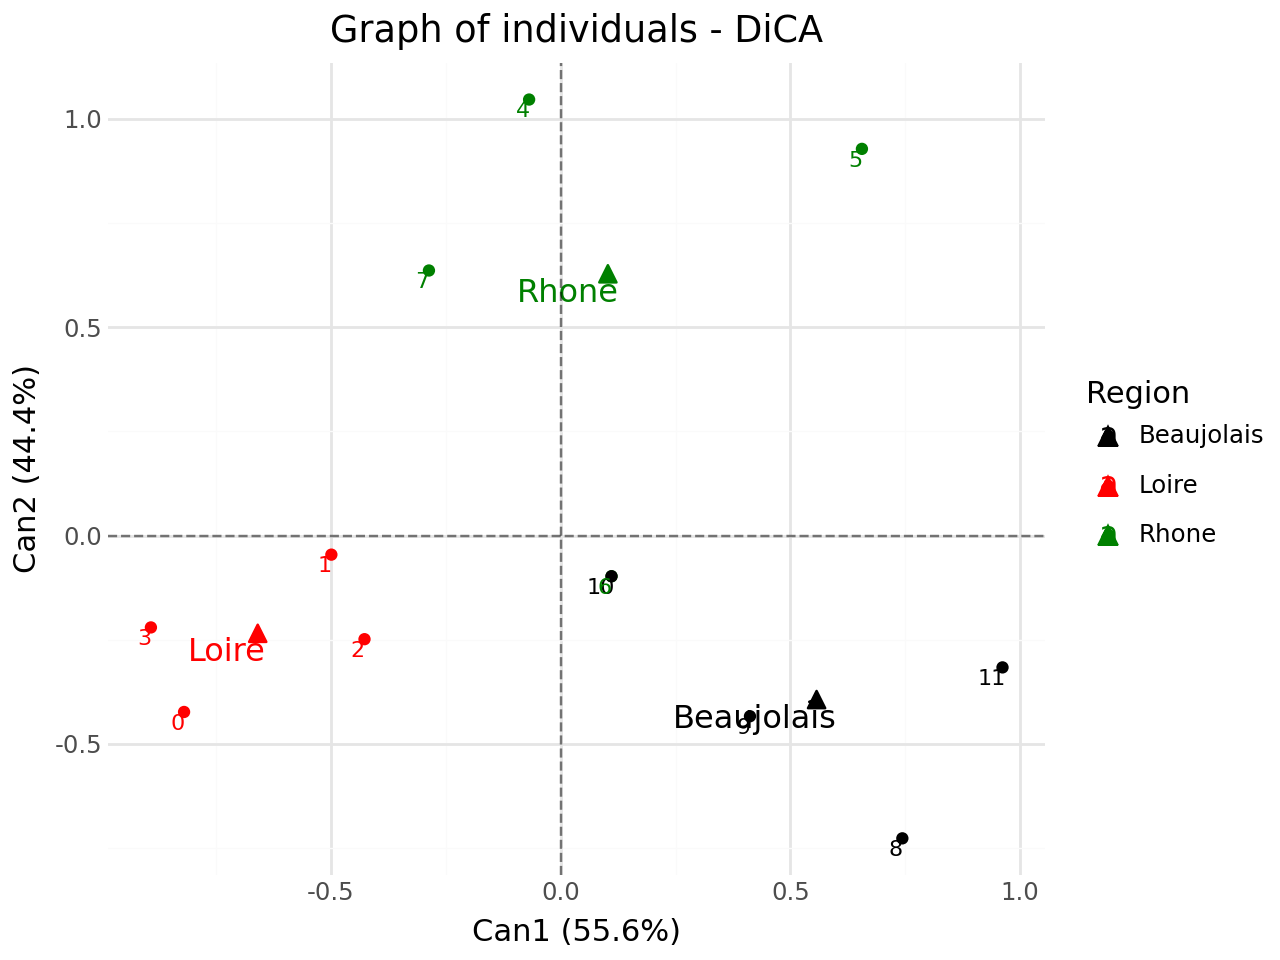

In [39]:
#graph of individuals
p = fviz_dica(clf,element="ind",repel=True)
p.show()

we add supplementary individuals

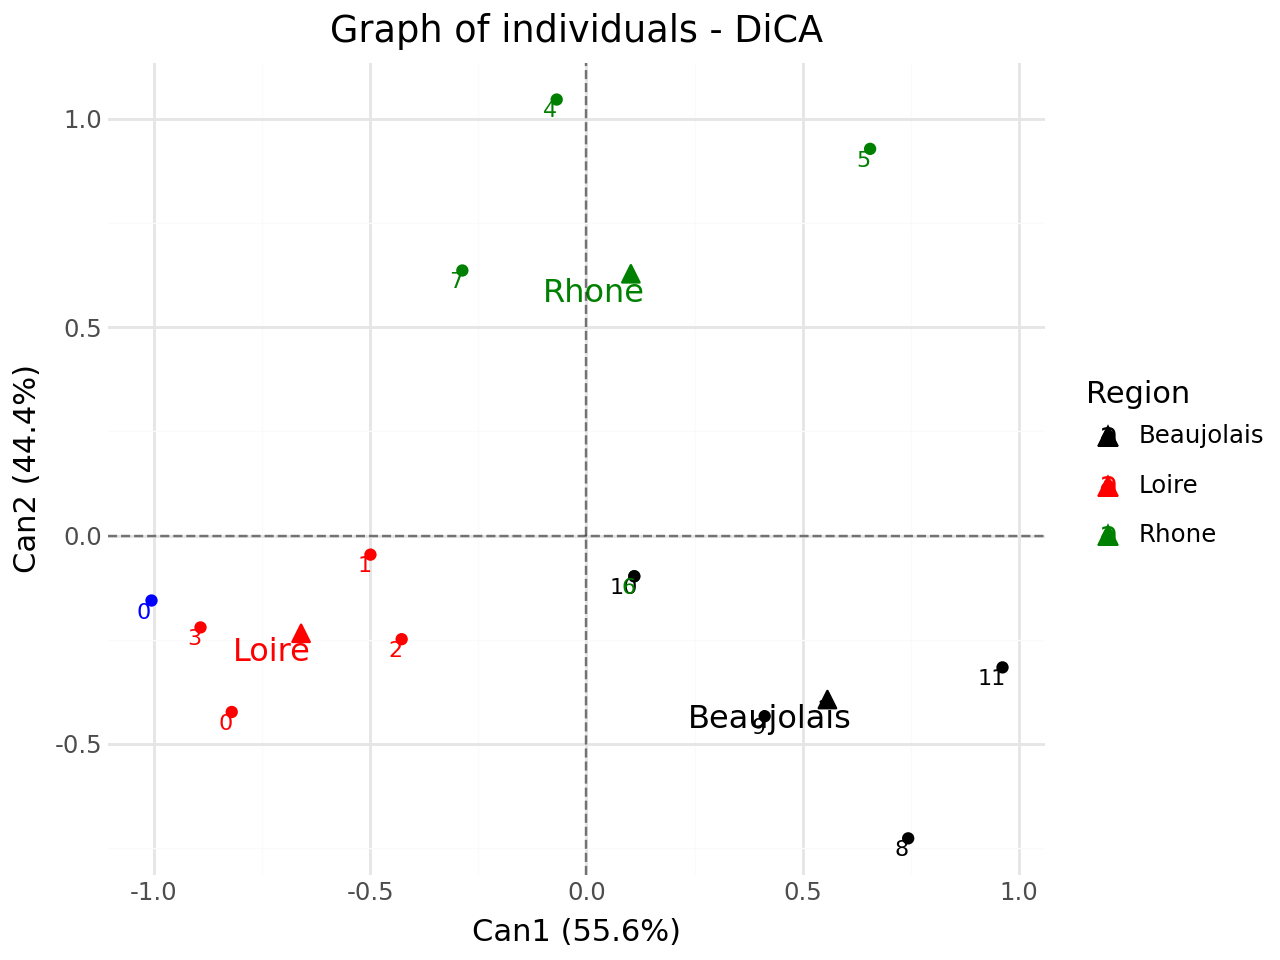

None


In [40]:
#with supplementary individuals
from discrimintools import add_scatter
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
print(p.show())

#### Graph of variables/categories

7 [0.80808934 0.18000401]
10 [0.17267555 0.31122708]
12 [-0.38605933 -0.84780643]
13 [-0.93712423  0.78493652]
14 [ 0.04563277 -0.59299836]
15 [ 0.58311963 -0.64587052]
1 [-0.82428     0.52043105]
4 [-0.71021836 -0.06343767]
2 [ 0.24321259 -0.12849718]
3 [0.11850763 0.87743293]


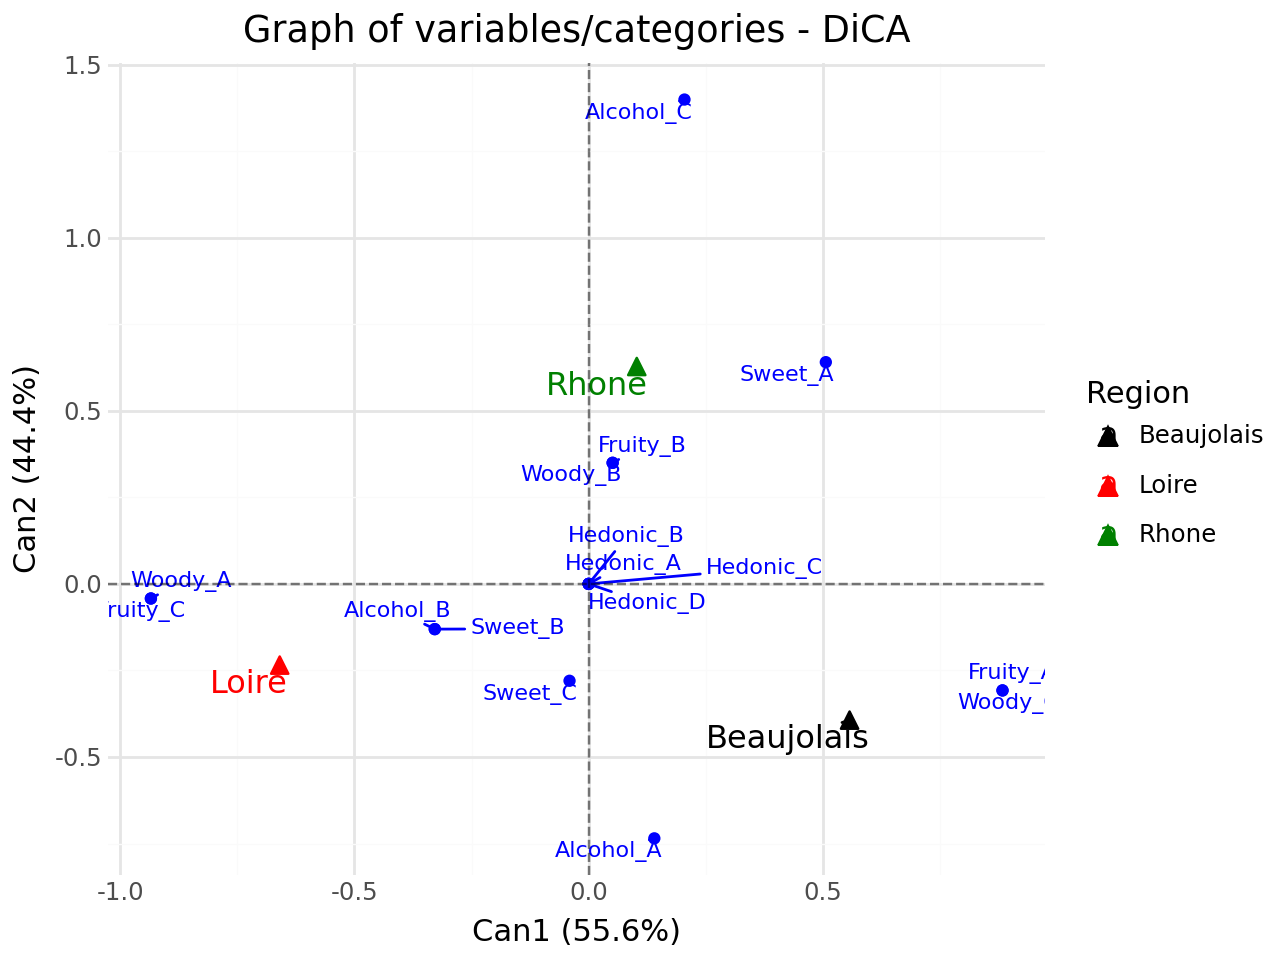

In [41]:
#graph of variables/categories
p = fviz_dica(clf,element="var",repel=True)
p.show()

#### Biplot of individuals and variables/categories

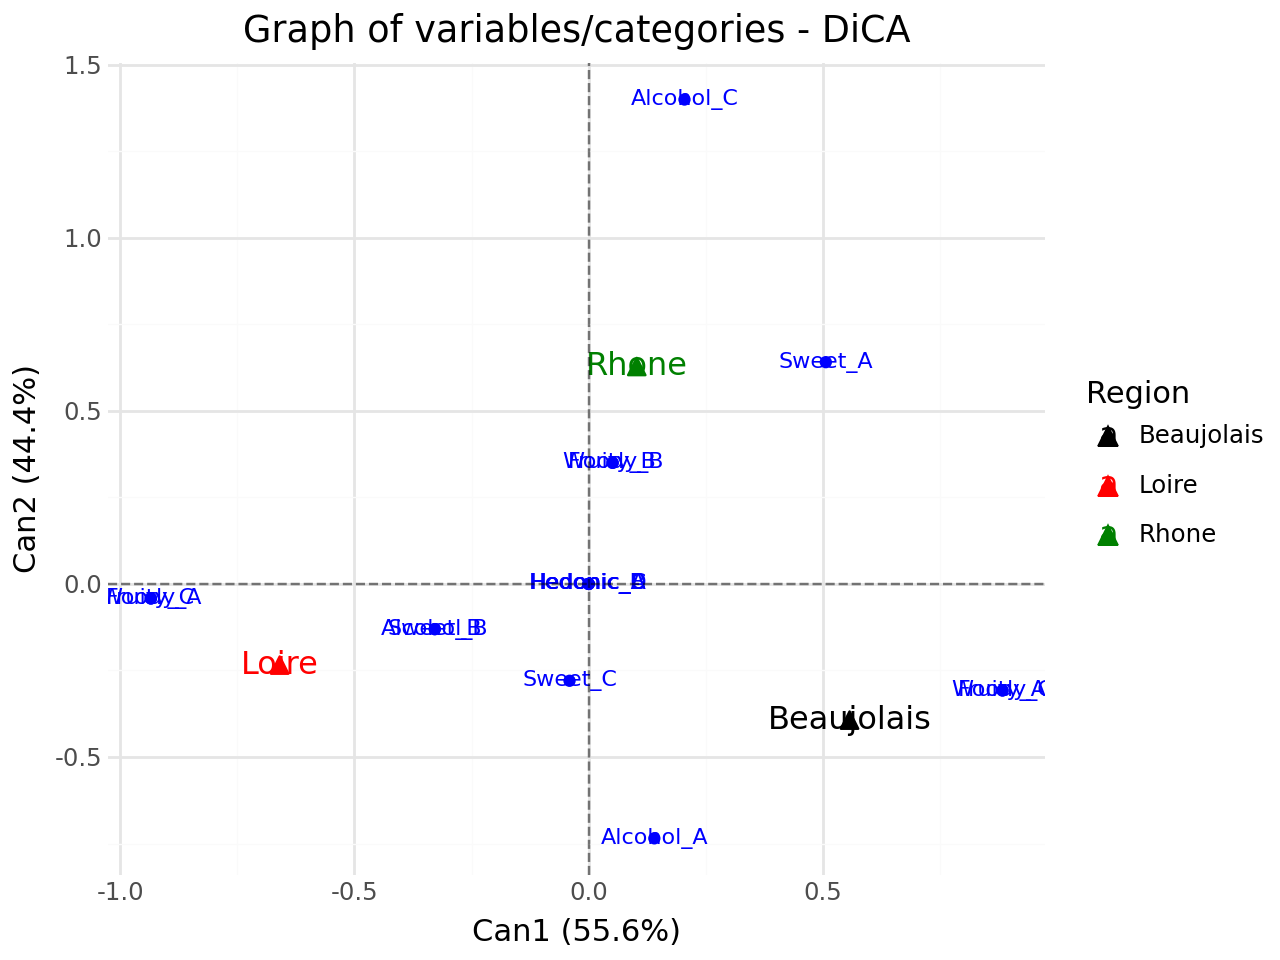

In [42]:
#biplot of individuals and variables/categories 
p = fviz_dica(clf,element="var",repel=False)
p.show()

##### Graph of qualitative variables

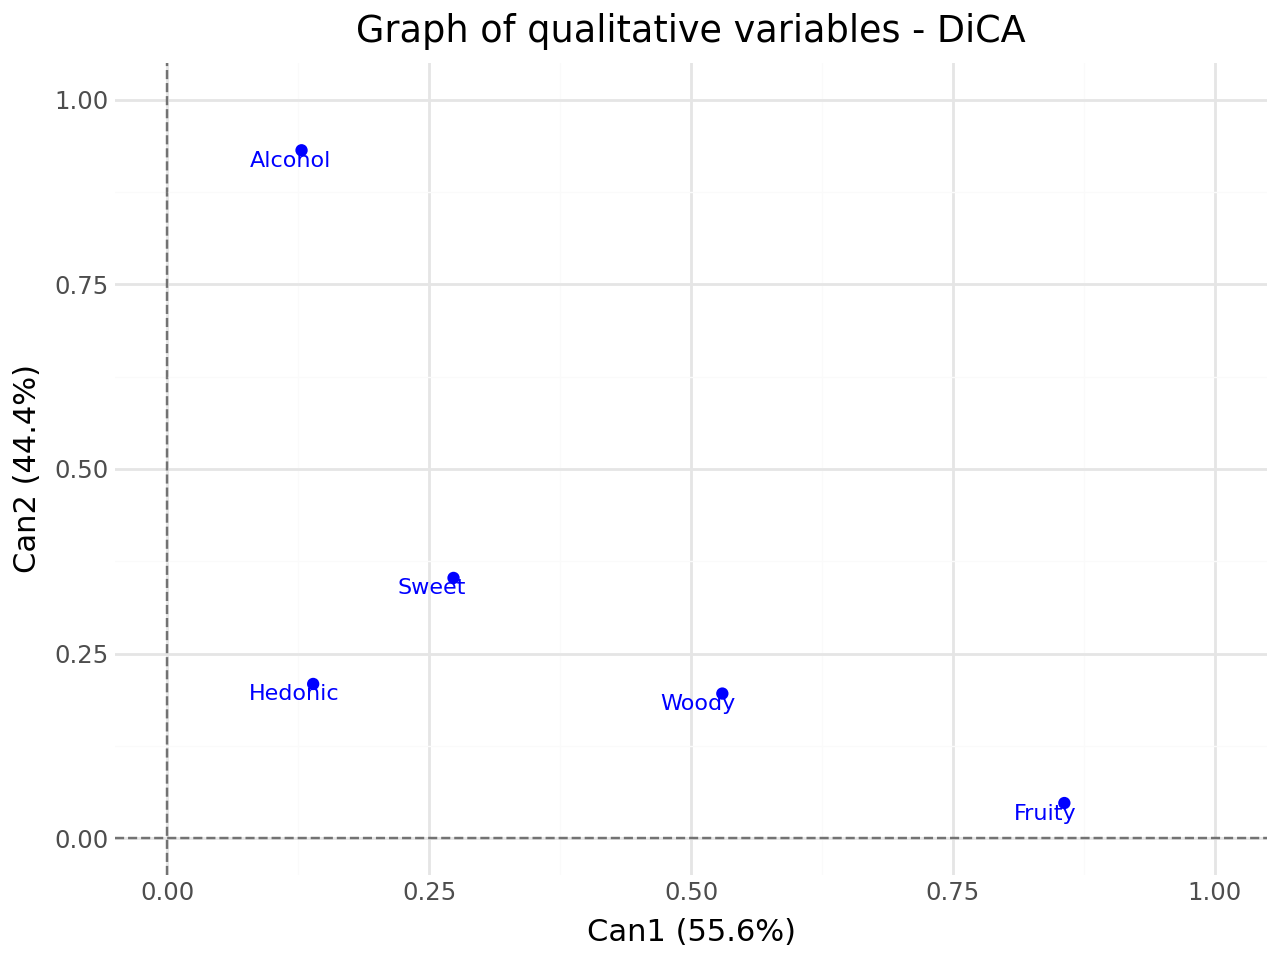

In [43]:
#graph of qualitative variables
p = fviz_dica(clf,element="quali_var",repel=True)
p.show()

#### Distance between barycenter

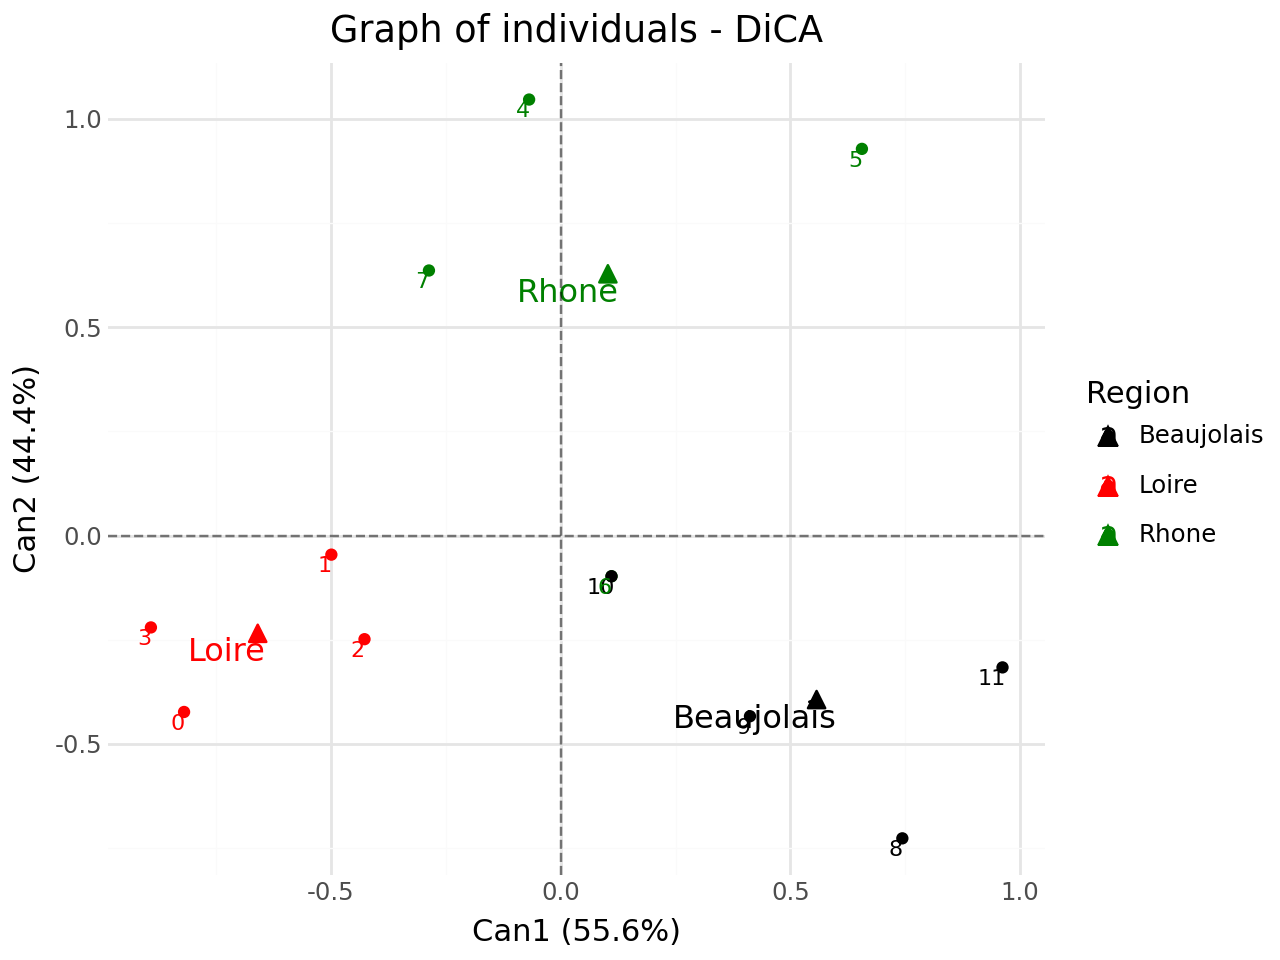

In [44]:
#Distance between barycenter
p = fviz_dica(clf,element="ind",repel=True)
p.show()